# Загрузка данных

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

level_codding = [
    "rps",
    "podrod",
    "filial",
    "client_sap_id",
    "freight_id",
    "sender_station_id",
    "recipient_station_id",
    "sender_organisation_id",
]

In [2]:
df = pd.read_csv("data/fact_train_test.csv", sep=";", decimal=",", encoding="windows-1251")
df["period"] = df["period"].astype("datetime64[ns]")
df[level_codding] = df[level_codding].astype("string")
df.head()

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count
0,2012-07-01,1,5,1,328,1193,30252,13005,10036,71.0,1
1,2012-10-01,1,5,1,328,1193,30252,11376,10036,210.0,3
2,2014-03-01,0,1,1,328,3472,30252,29548,10036,67.0,1
3,2014-03-01,0,1,1,328,3472,30252,29158,10036,67.0,1
4,2014-03-01,0,2,1,328,3472,30252,27484,10036,66.0,1


# Уникальный идентификатор ряда
Cоздадим уникальный идентификатор("segment"), для каждого временного ряда на самом низком уровне иерархии

In [3]:
df["segment"] = (
    df["rps"]
    + "#"
    + df["podrod"]
    + "#"
    + df["filial"]
    + "#"
    + df["client_sap_id"]
    + "#"
    + df["freight_id"]
    + "#"
    + df["sender_station_id"]
    + "#"
    + df["recipient_station_id"]
    + "#"
    + df["sender_organisation_id"]
)
df = df[["period", "segment", "real_wagon_count"]].rename(columns={"period": "timestamp", "real_wagon_count": "target"})

# Создание датасета
Создадим контейнер для временных рядов, который будет хранить историю всех возможных уникальных рядов на нижнем уровне за всю историю

In [4]:
from etna.datasets import TSDataset

In [5]:
df = TSDataset.to_dataset(df)
ts = TSDataset(df, freq="MS")
ts.head()

segment,0#0#0#-1#1012#37642#37642#20215,0#0#0#-1#1012#37642#37642#25591,0#0#0#-1#1012#37642#37642#34117,0#0#0#-1#1012#38641#38641#20215,0#0#0#-1#1012#38641#38641#25591,0#0#0#-1#1012#38641#38641#34117,0#0#0#-1#1029#11020#37794#10571,0#0#0#-1#1036#33075#9352#22796,0#0#0#-1#109#13440#13625#21019,0#0#0#-1#109#13440#13625#26597,...,1#5#2#997#317#13440#13635#20351,1#5#2#997#336#13440#13624#19921,1#5#2#997#336#13440#13624#20351,1#5#2#997#336#13440#13625#20351,1#5#2#997#349#13440#13624#19921,1#5#2#997#349#13440#13624#20351,1#5#2#997#349#13440#13625#20351,1#5#2#997#349#13440#2677#20351,1#5#2#999#729#35716#5912#7410,1#9#2#-1#864#10724#10829#25808
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Заполнение пропусков
Очевидно пропуски в нашем случае это отсутствие спроса, то есть 0

In [7]:
ts.df = ts.df.fillna(0)
ts.raw_df = ts.raw_df.fillna(0)
ts.head()

segment,0#0#0#-1#1012#37642#37642#20215,0#0#0#-1#1012#37642#37642#25591,0#0#0#-1#1012#37642#37642#34117,0#0#0#-1#1012#38641#38641#20215,0#0#0#-1#1012#38641#38641#25591,0#0#0#-1#1012#38641#38641#34117,0#0#0#-1#1029#11020#37794#10571,0#0#0#-1#1036#33075#9352#22796,0#0#0#-1#109#13440#13625#21019,0#0#0#-1#109#13440#13625#26597,...,1#5#2#997#317#13440#13635#20351,1#5#2#997#336#13440#13624#19921,1#5#2#997#336#13440#13624#20351,1#5#2#997#336#13440#13625#20351,1#5#2#997#349#13440#13624#19921,1#5#2#997#349#13440#13624#20351,1#5#2#997#349#13440#13625#20351,1#5#2#997#349#13440#2677#20351,1#5#2#999#729#35716#5912#7410,1#9#2#-1#864#10724#10829#25808
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Модель

In [8]:
from etna.models import SeasonalMovingAverageModel
from etna.pipeline import Pipeline
from etna.ensembles import VotingEnsemble

In [9]:
# Усреднение последнийх 3 лет -- в данных видна годовая сезонность
pipeline_seasonal = Pipeline(model=SeasonalMovingAverageModel(window=3, seasonality=12), transforms=[], horizon=5)

# Усреднение последнийх 5 месяцев -- отражает текущий уровень ряда
pipeline_window = Pipeline(model=SeasonalMovingAverageModel(window=5, seasonality=1), transforms=[], horizon=5)

# Последний месяц -- самое жесткое решение на протяжении контеста
pipeline_window_1 = Pipeline(model=SeasonalMovingAverageModel(window=1, seasonality=1), transforms=[], horizon=5)

# Делаем ансамбль -- веса подобраны на валидации
pipeline_vote = VotingEnsemble([pipeline_seasonal, pipeline_window, pipeline_window_1], weights=[0.2, 0.2, 0.6])

# Обучение

In [10]:
pipeline_vote.fit(ts)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   10.3s


VotingEnsemble(pipelines = [Pipeline(model = SeasonalMovingAverageModel(window = 3, seasonality = 12, ), transforms = [], horizon = 5, ), Pipeline(model = SeasonalMovingAverageModel(window = 5, seasonality = 1, ), transforms = [], horizon = 5, ), Pipeline(model = SeasonalMovingAverageModel(window = 1, seasonality = 1, ), transforms = [], horizon = 5, )], weights = [0.2, 0.2, 0.6], regressor = RandomForestRegressor(n_estimators=5), n_folds = 3, n_jobs = 1, joblib_params = {'verbose': 11, 'backend': 'multiprocessing', 'mmap_mode': 'c'}, )

# Предсказания
Внутри пайплайна для каждой из моделей генерируется прогноз, далее прогнозы смешиваются с весами

In [11]:
future = pipeline_vote.forecast()

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  4.0min


# Наримуем что получилось

Идеально прогнозируем отсутствие спроса)))

In [12]:
from etna.analysis import plot_forecast

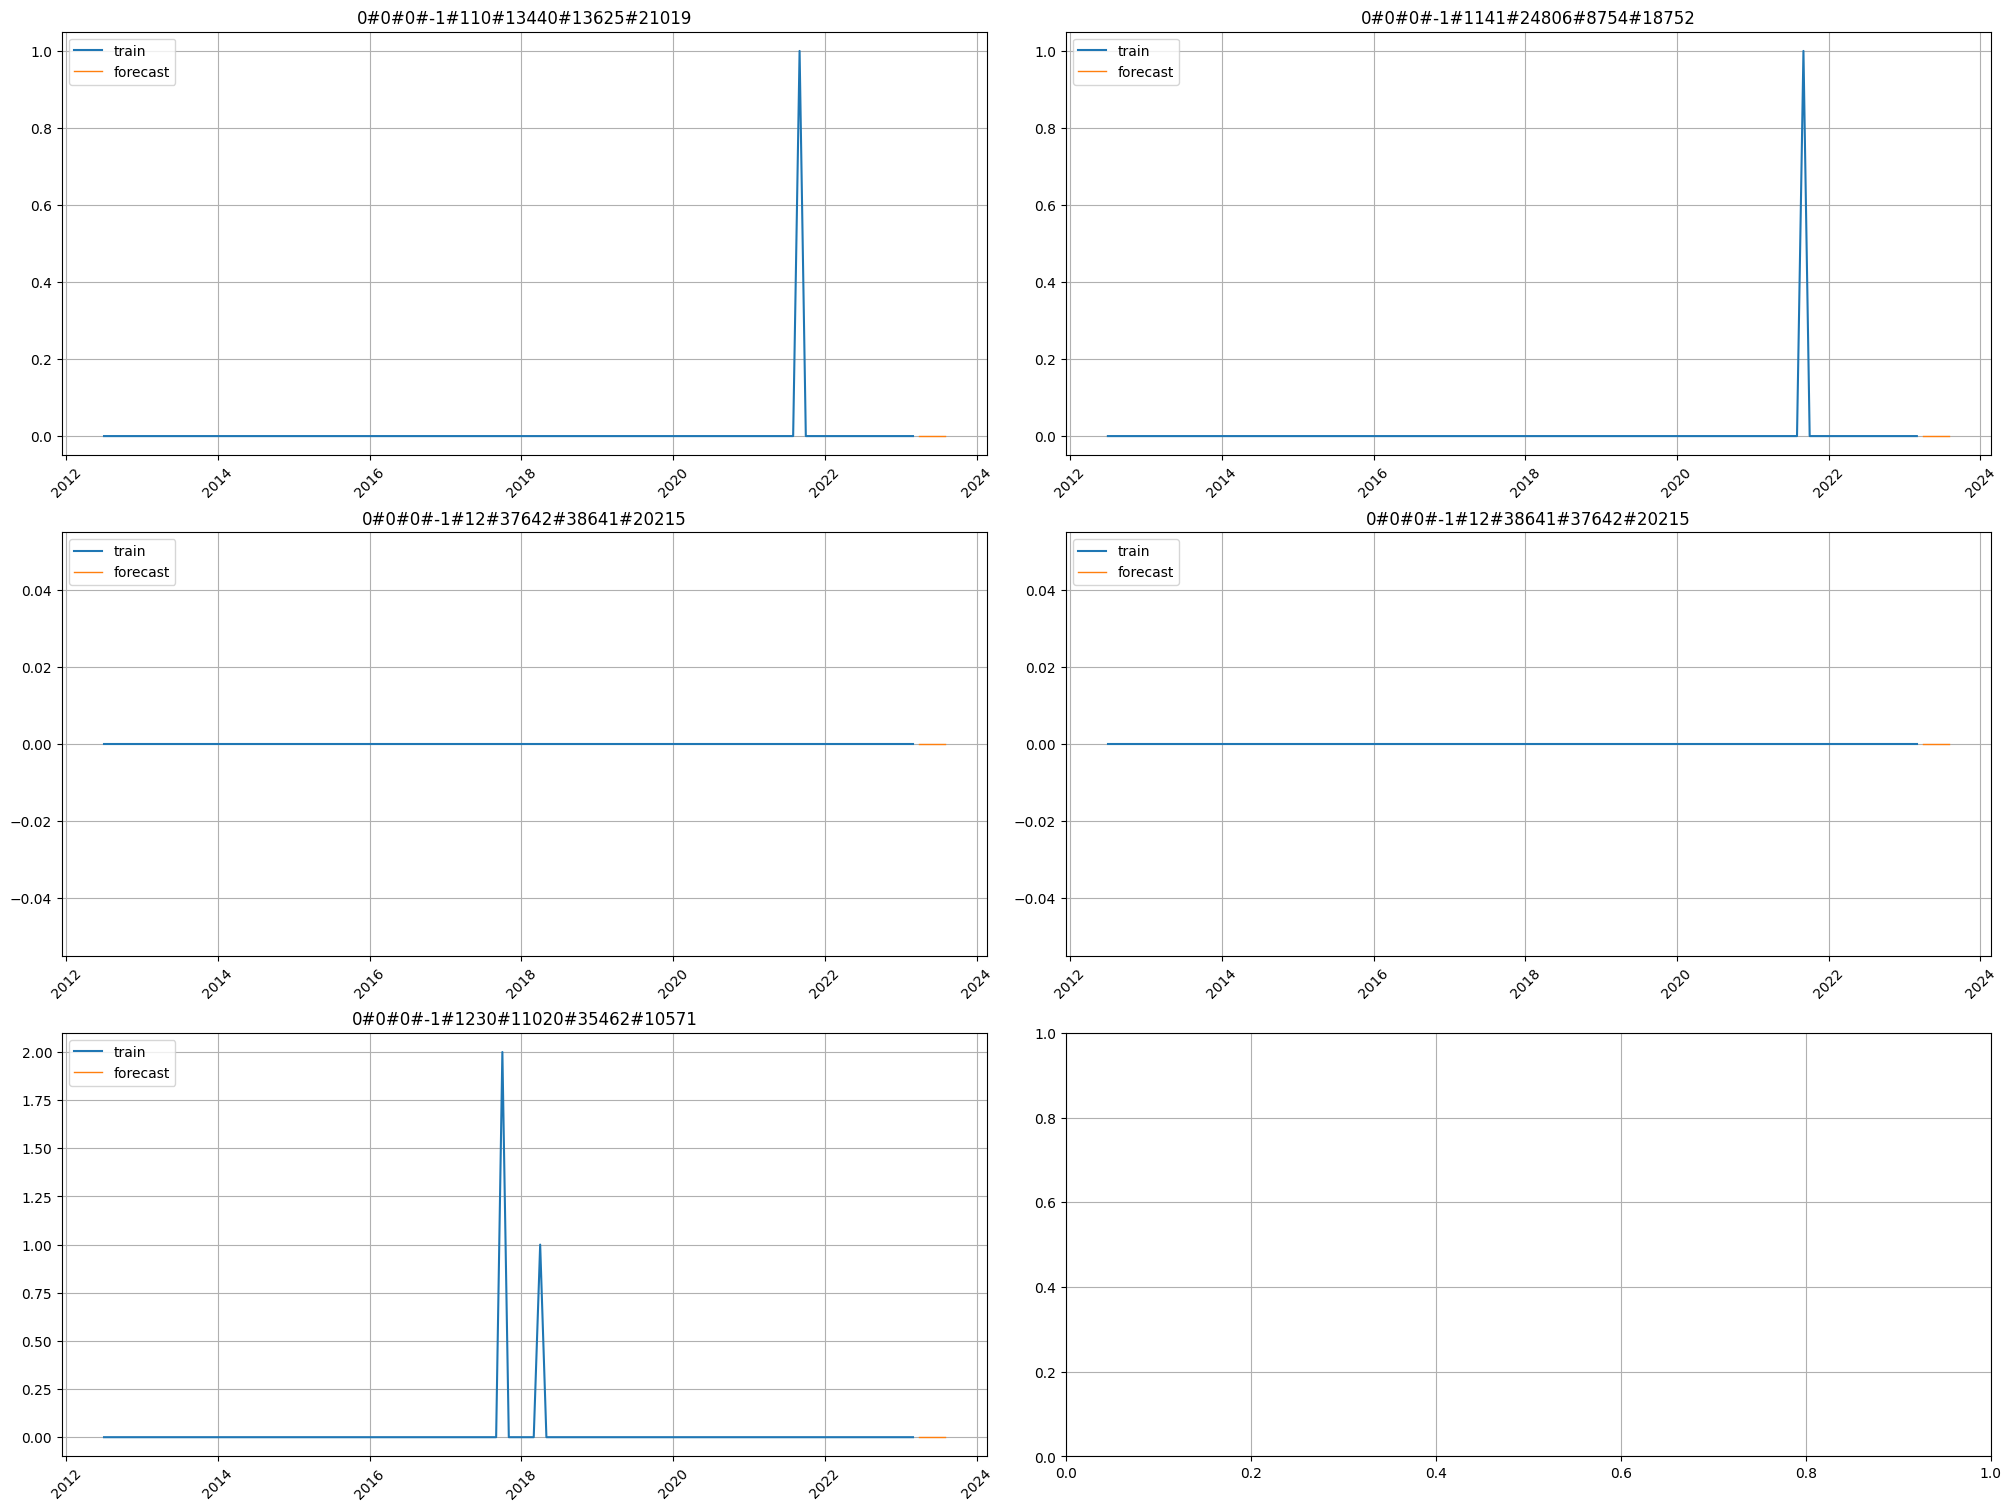

In [22]:
plot_forecast(forecast_ts=future, train_ts=ts, segments=ts.segments[10:15])

# Приводим данные к нужному формату

In [14]:
forecast_df = future.to_pandas(flatten=True)

# Прогноз для весов

По историческим данным можно оценить вместимость вагона(68 тонн для любого типа) -- наверное точнее было бы прогнозировать веса, а потом делить на 68(но мы не успели попробовать)

In [17]:
forecast_df["forecast_weight"] = forecast_df["target"] * 68

# Выделяем нужные поля

In [19]:
forecast_df[level_codding] = forecast_df["segment"].str.split("#", expand=True)
forecast_df.drop(columns=["segment"], inplace=True)
forecast_df = forecast_df.rename(columns={"timestamp": "period", "target": "forecast_wagon_count"})
forecast_df[forecast_df.columns[2:-1]] = forecast_df[forecast_df.columns[2:-1]].astype("int64")

In [20]:
forecast_df.head()

,period,forecast_wagon_count,forecast_weight,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id
0,2023-04-01,0.066667,4,0,0,0,-1,1012,37642,37642,20215
1,2023-05-01,0.066667,4,0,0,0,-1,1012,37642,37642,20215
2,2023-06-01,0.000000,0,0,0,0,-1,1012,37642,37642,20215
3,2023-07-01,0.000000,0,0,0,0,-1,1012,37642,37642,20215
4,2023-08-01,0.000000,0,0,0,0,-1,1012,37642,37642,20215


In [21]:
forecast_df.to_csv(
    "forecasts/sma_voting_final.csv",
    index=False,
    sep=";",
    decimal=",",
    encoding="windows-1251",
)